# Data Professional Salaries
###### Data Scientists, Data Analysts, Data Engineers

## Manipulating and Cleaning Data

In [286]:
import pandas as pd

In [360]:
data = pd.read_csv("Data\mls-salaries-2017.csv", sep = ',')
data = data[['club', 'first_name', 'last_name','position', 'base_salary', 'guaranteed_compensation']]
data.head()

,club,first_name,last_name,position,base_salary,guaranteed_compensation
0,ATL,Miguel,Almiron,M,1912500.0,2297000.00
1,ATL,Mikey,Ambrose,D,65625.0,65625.00
2,ATL,Yamil,Asad,M,150000.0,150000.00
3,ATL,Mark,Bloom,D,99225.0,106573.89
4,ATL,Andrew,Carleton,F,65000.0,77400.00


In [288]:
# O dataset contém dados nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
club                       614 non-null object
first_name                 612 non-null object
last_name                  616 non-null object
position                   616 non-null object
base_salary                616 non-null float64
guaranteed_compensation    616 non-null float64
dtypes: float64(2), object(4)
memory usage: 29.0+ KB


In [289]:
# Apagando os dados nulos
data = data.dropna()

In [290]:
# Dataset sem dados nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 613
Data columns (total 6 columns):
club                       610 non-null object
first_name                 610 non-null object
last_name                  610 non-null object
position                   610 non-null object
base_salary                610 non-null float64
guaranteed_compensation    610 non-null float64
dtypes: float64(2), object(4)
memory usage: 33.4+ KB


In [291]:
data.head()

,club,first_name,last_name,position,base_salary,guaranteed_compensation
0,ATL,Miguel,Almiron,M,1912500.0,2297000.00
1,ATL,Mikey,Ambrose,D,65625.0,65625.00
2,ATL,Yamil,Asad,M,150000.0,150000.00
3,ATL,Mark,Bloom,D,99225.0,106573.89
4,ATL,Andrew,Carleton,F,65000.0,77400.00


### 

## MSL Salaries per Club in 2017



In [292]:
import numpy as np
import matplotlib.pyplot as plt

In [293]:
data.head()

,club,first_name,last_name,position,base_salary,guaranteed_compensation
0,ATL,Miguel,Almiron,M,1912500.0,2297000.00
1,ATL,Mikey,Ambrose,D,65625.0,65625.00
2,ATL,Yamil,Asad,M,150000.0,150000.00
3,ATL,Mark,Bloom,D,99225.0,106573.89
4,ATL,Andrew,Carleton,F,65000.0,77400.00


In [532]:
data.club.unique()

array(['ATL', 'CHI', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC',
       'MNUFC', 'MTL', 'NE', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL',
       'SEA', 'SJ', 'TOR', 'VAN', nan], dtype=object)

In [558]:
# Changing clubs names
data['club'] = data['club'].replace(
            to_replace=['ATL', 'CHI', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC',
            'MNUFC', 'MTL', 'NE', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL',
            'SEA', 'SJ', 'TOR', 'VAN'],
            value=['Atlanta', 'Chicago', 'Columbus', 'Colorado', 'FC Dallas', 'DC United',
            'Houston', 'Kansas City', 'LA Galaxy', 'Los Angeles FC', 'Misnnesota', 'Montreal',
            'New England', 'New York FC', 'NY Red Bulls', 'Orlando', 'Philadelphia', 'Portland',
            'RS Lake', 'Seattle', 'San Jose', 'Toronto', 'Vancouver'])

In [559]:
# Grouping the dataset to plot later
cs = data[['club', 'base_salary']].groupby(['club']).sum().reset_index().sort_values(by='base_salary', ascending=False).drop(index=9)
cs

,club,base_salary
21,Toronto,20074947.00
14,New York FC,17370525.68
1,Chicago,11572616.00
8,LA Galaxy,9833666.64
17,Portland,9294532.04
20,Seattle,8986702.89
0,Atlanta,8035616.04
2,Colorado,7254748.75
22,Vancouver,7040366.08
18,RS Lake,6856440.44


In [535]:
# Building variables to have a proeficient code understanding

clubs = cs['club']
salaries = cs['base_salary']
salaries

21    20074947.00
14    17370525.68
15    12382053.80
1     12272624.00
8      9833666.64
17     9294532.04
20     8986702.89
0      8035616.04
2      7254748.75
22     7040366.08
18     6856440.44
16     6516876.00
19     6429566.00
3      6345232.48
12     6313982.00
7      6223848.00
5      5990579.28
13     5406993.25
11     5074671.08
10     4926046.04
6      4904049.98
4      4812135.44
Name: base_salary, dtype: float64

In [536]:
x = np.arange(len(clubs))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [537]:
length = 0.65

In [538]:
def autolabel(clubs):
    for i in clubs:
        h = i.get_height()
        ax.annotate('{}'.format(h),
                xy = (i.get_x()+i.get_width()/2,h),
                xytext = (0,2),
                textcoords = 'offset points',
                ha = 'center')


#### Ploting Bar Graphic

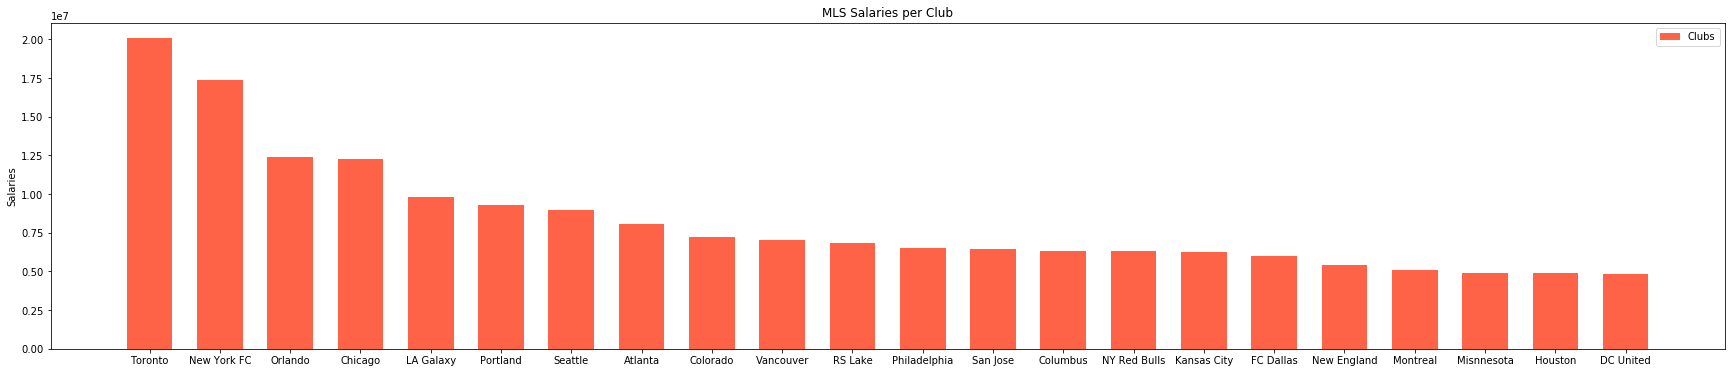

In [541]:
fig,ax = plt.subplots(figsize = (30,6))

grafico = ax.bar(x, salaries, length, label = 'Clubs', color = 'Tomato')

ax.set_title('MLS Salaries per Club')
ax.set_ylabel('Salaries')

ax.set_xticks(x)
ax.set_xticklabels(clubs)
ax.legend()


plt.show()

## MLS Salaries per Position